In [30]:
import torch
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from Model.utils import (
    Params, fixed_kernel_initializer, fixed_bias_initializer,
    get_confusion_matrx
)
from PIL import  Image
from torchvision import models
from scipy.signal import savgol_filter

sns.set(color_codes=True)
sns.set_style("whitegrid")
%matplotlib inline  

### Binary Model
* Visualize the learning of Binary Classifier.

In [18]:
dev_loss = pd.read_csv(
    './stats/run_base_model_IV_aggressive_dropout_eval_summaries-tag-loss.csv')
train_loss = pd.read_csv(
    './stats/run_base_model_IV_aggressive_dropout_train_summaries-tag-loss.csv')
dev_acc = pd.read_csv(
    './stats/run_base_model_IV_aggressive_dropout_eval_summaries-tag-accuracy.csv')
train_acc = pd.read_csv(
    './stats/run_base_model_IV_aggressive_dropout_train_summaries-tag-accuracy.csv')

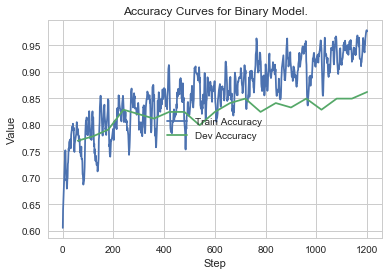

In [34]:
fig, ax = plt.subplots()
ax.plot(
    train_acc.Step, savgol_filter(train_acc.Value, 13, 2),
    label="Train Accuracy"
)
ax.plot(
    dev_acc.Step, dev_acc.Value,
    label="Dev Accuracy"
)
plt.ylabel('Value')
plt.xlabel('Step')
plt.title("Accuracy Curves for Binary Model.")
legend = ax.legend(loc='center', shadow=True)
plt.savefig('train_dev_acc_bin.png')
plt.show()

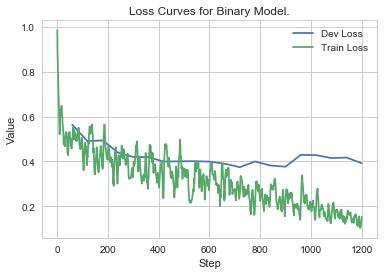

In [36]:
fig, ax = plt.subplots()
ax.plot(
    dev_loss.Step, dev_loss.Value,
    label="Dev Loss"
)
ax.plot(
    train_loss.Step, savgol_filter(train_loss.Value, 13, 2),
    label="Train Loss"
)
plt.ylabel('Value')
plt.xlabel('Step')
plt.title("Loss Curves for Binary Model.")
legend = ax.legend(loc='best', shadow=True)
plt.savefig('train_dev_loss_bin.png')
plt.show()

### Multi-Class Model.
> Visualize the learning curves of the multi-class classifier.

In [20]:
train_loss_1 = pd.read_csv(
    './stats/run_Multinomial_fixed_k2_and_k1_agg_dropout_train_summaries-tag-loss.csv'
)
dev_loss_1 = pd.read_csv(
    './stats/run_Multinomial_fixed_k2_and_k1_agg_dropout_eval_summaries-tag-loss.csv'
)
train_loss_2 = pd.read_csv(
    './stats/run_Multinomial_base_multinomial_4_layers_train_summaries-tag-loss.csv'
)
dev_loss_2 = pd.read_csv(
    './stats/run_Multinomial_base_multinomial_4_layers_eval_summaries-tag-loss.csv'
)


train_acc_1 = pd.read_csv(
    './stats/run_Multinomial_fixed_k2_and_k1_agg_dropout_train_summaries-tag-accuracy.csv'
)
dev_acc_1 = pd.read_csv(
    './stats/run_Multinomial_fixed_k2_and_k1_agg_dropout_eval_summaries-tag-accuracy.csv'
)
train_acc_2 = pd.read_csv(
    './stats/run_Multinomial_base_multinomial_4_layers_train_summaries-tag-accuracy.csv'
)
dev_acc_2 = pd.read_csv(
    './stats/run_Multinomial_base_multinomial_4_layers_eval_summaries-tag-accuracy (1).csv'
)

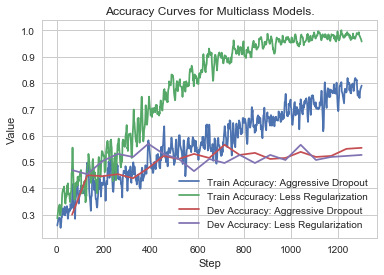

In [28]:
fig, ax = plt.subplots()
ax.plot(
    train_acc_1.Step, savgol_filter(train_acc_1.Value, 13, 2),
    label="Train Accuracy: Aggressive Dropout"
)
ax.plot(
    train_acc_2.Step, savgol_filter(train_acc_2.Value, 13, 2),
    label="Train Accuracy: Less Regularization"
)
ax.plot(
    dev_acc_1.Step, dev_acc_1.Value,
    label="Dev Accuracy: Aggressive Dropout"
)
ax.plot(
    dev_acc_2.Step, dev_acc_2.Value,
    label="Dev Accuracy: Less Regularization"
)

plt.ylabel('Value')
plt.xlabel('Step')
plt.title("Accuracy Curves for Multiclass Models.")
legend = ax.legend(loc='best', shadow=True)
plt.savefig('train_dev_acc_multiclass.png')
plt.show()

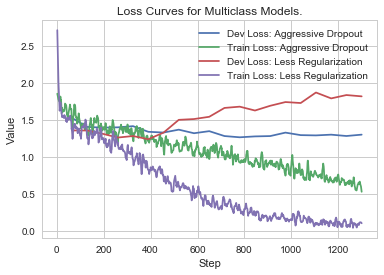

In [29]:
fig, ax = plt.subplots()
ax.plot(
    dev_loss_1.Step, dev_loss_1.Value,
    label="Dev Loss: Aggressive Dropout"
)
ax.plot(
    train_loss_1.Step, savgol_filter(train_loss_1.Value, 13, 2),
    label="Train Loss: Aggressive Dropout"
)
ax.plot(
    dev_loss_2.Step, dev_loss_2.Value,
    label="Dev Loss: Less Regularization"
)
ax.plot(
    train_loss_2.Step, savgol_filter(train_loss_2.Value, 13, 2),
    label="Train Loss: Less Regularization"
)

plt.ylabel('Value')
plt.xlabel('Step')
plt.title("Loss Curves for Multiclass Models.")
legend = ax.legend(loc='best', shadow=True)
plt.savefig('train_dev_loss_multiclass.png')
plt.show()